# IMT 573 - Problem Set 7 - Regression

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

5. Partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are *strongly* encouraged to attempt each question and document their reasoning process even if they cannot find the correct answer. 

6. After completing the assignment, ensure that your code can run from start to finish without issue. Restart the kernal and run all cells to double check.

Name: Steve Gonzales Collaborators: None

For this assignment, you'll need (at least) the following packages. If the package does not load, be sure it is properly installed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None) # Display all columns

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)

Previously, we examined police beat data joined with census tracts. In this problem set, we will perform regression analysis on this data.



### Problem 1: Load and examine crime data

#### (a) Load the beat and census data

You'll find a trimmed version of the beats and census data in the `census_beat_data_trimmed.csv` file. Load this data into a DataFrame. Note the variables in the data set.

In [4]:
df = pd.read_csv('census_beat_data_trimmed.csv')
print(df.columns.tolist())
display(df)
df.shape

['geo_id', 'pri_offense_desc', 'year', 'pop_18_24', 'pop_25_over', 'ed_high_sch_grad_higher_25_over', 'ed_bach_deg_grad_higher_25_over']


,geo_id,pri_offense_desc,year,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over
0,1400000US53033009200,NARC-POSSESS-MARIJU,2012,118,2557,2106,985
1,1400000US53033003202,ROBBERY-BUSINESS-GUN,2012,181,3656,3656,2506
2,1400000US53033004600,VEH-THEFT-AUTO,2012,224,2690,2646,2111
3,1400000US53033008600,DUI-LIQUOR,2012,2975,3436,3316,2154
4,1400000US53033007502,ROBBERY-RESIDENCE-BODYFORCE,2012,322,2247,2247,1781
...,...,...,...,...,...,...,...
347975,1400000US53033010900,CHILD-OTHER,2019,20,935,880,433
347976,1400000US53033007502,BURGLARY-FORCE-RES,2019,322,2247,2247,1781
347977,1400000US53033011801,ROBBERY-BUSINESS-BODYFORCE,2019,432,2406,1990,976
347978,1400000US53033001100,THEFT-SHOPLIFT,2019,150,2089,2002,1463


(347980, 7)

#### (b) Examine years in data

Next, examine the years that are present in the dataset. Does it look as though there are years with incomplete or missing data? Filter the data such that it only contains data from the years 2016-2018 (inclusive).

In [5]:
display(df.dtypes)
display(df.describe())

geo_id                             object
pri_offense_desc                   object
year                                int64
pop_18_24                           int64
pop_25_over                         int64
ed_high_sch_grad_higher_25_over     int64
ed_bach_deg_grad_higher_25_over     int64
dtype: object

,year,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over
count,347980.000000,347980.000000,347980.000000,347980.000000,347980.000000
mean,2015.292574,443.376562,3120.546658,2971.346023,2029.281680
std,2.091865,640.939904,1026.468567,1014.723950,857.462051
min,2012.000000,20.000000,142.000000,115.000000,68.000000
25%,2014.000000,181.000000,2557.000000,2352.000000,1317.000000
50%,2015.000000,284.000000,3054.000000,2721.000000,1923.000000
75%,2017.000000,432.000000,3656.000000,3656.000000,2506.000000
max,2019.000000,3308.000000,5996.000000,5408.000000,3716.000000


In [6]:
# Do some basic data profiling for each year to see if there a big gaps in the data
df_crime = df.copy()
df_crime['year'] = df_crime['year'].astype(int)
for year in range(2012, 2020):
    df_temp = df_crime[(df_crime['year'] == year)]
    display(df_temp.describe())

,year,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over
count,40768.0,40768.000000,40768.000000,40768.000000,40768.000000
mean,2012.0,436.089212,3128.902571,2972.971522,2025.757702
std,0.0,628.413631,1008.412101,1000.719609,853.741486
min,2012.0,20.000000,142.000000,115.000000,68.000000
25%,2012.0,181.000000,2601.000000,2352.000000,1317.000000
50%,2012.0,284.000000,3060.000000,2694.000000,1923.000000
75%,2012.0,416.000000,3656.000000,3656.000000,2506.000000
max,2012.0,3308.000000,5996.000000,5408.000000,3716.000000


,year,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over
count,45259.0,45259.000000,45259.000000,45259.000000,45259.000000
mean,2013.0,434.981263,3129.908681,2977.389204,2036.829625
std,0.0,622.169471,995.893930,989.269371,847.151155
min,2013.0,20.000000,142.000000,115.000000,68.000000
25%,2013.0,173.000000,2601.000000,2352.000000,1317.000000
50%,2013.0,284.000000,3060.000000,2721.000000,1923.000000
75%,2013.0,432.000000,3656.000000,3656.000000,2600.000000
max,2013.0,3308.000000,5996.000000,5408.000000,3716.000000


,year,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over
count,49101.0,49101.000000,49101.000000,49101.000000,49101.000000
mean,2014.0,442.632920,3117.446447,2963.638276,2026.637747
std,0.0,634.046961,1022.388541,1010.013094,861.191295
min,2014.0,20.000000,142.000000,115.000000,68.000000
25%,2014.0,181.000000,2557.000000,2317.000000,1317.000000
50%,2014.0,287.000000,3054.000000,2694.000000,1923.000000
75%,2014.0,432.000000,3656.000000,3656.000000,2600.000000
max,2014.0,3308.000000,5996.000000,5408.000000,3716.000000


,year,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over
count,47491.0,47491.000000,47491.000000,47491.000000,47491.000000
mean,2015.0,458.936325,3101.837738,2954.524436,2021.933503
std,0.0,672.134639,1034.567728,1022.004252,866.495530
min,2015.0,20.000000,142.000000,115.000000,68.000000
25%,2015.0,181.000000,2557.000000,2352.000000,1317.000000
50%,2015.0,287.000000,3054.000000,2721.000000,1923.000000
75%,2015.0,432.000000,3656.000000,3656.000000,2506.000000
max,2015.0,3308.000000,5996.000000,5408.000000,3716.000000


,year,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over
count,48957.0,48957.000000,48957.000000,48957.000000,48957.000000
mean,2016.0,448.655984,3111.019466,2967.727945,2027.544539
std,0.0,646.139256,1030.715304,1019.820054,856.328266
min,2016.0,20.000000,142.000000,115.000000,68.000000
25%,2016.0,181.000000,2601.000000,2352.000000,1317.000000
50%,2016.0,287.000000,3054.000000,2694.000000,1923.000000
75%,2016.0,432.000000,3656.000000,3656.000000,2506.000000
max,2016.0,3308.000000,5996.000000,5408.000000,3716.000000


,year,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over
count,49959.0,49959.000000,49959.000000,49959.000000,49959.000000
mean,2017.0,440.380252,3098.989491,2955.547449,2018.899938
std,0.0,638.589052,1020.863573,1008.806658,847.831944
min,2017.0,20.000000,142.000000,115.000000,68.000000
25%,2017.0,173.000000,2557.000000,2352.000000,1317.000000
50%,2017.0,284.000000,3054.000000,2694.000000,1923.000000
75%,2017.0,432.000000,3656.000000,3656.000000,2506.000000
max,2017.0,3308.000000,5996.000000,5408.000000,3716.000000


,year,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over
count,50922.0,50922.000000,50922.000000,50922.000000,50922.000000
mean,2018.0,435.034111,3148.231511,2999.664526,2044.273516
std,0.0,628.795727,1045.673753,1030.306170,861.087793
min,2018.0,20.000000,142.000000,115.000000,68.000000
25%,2018.0,181.000000,2601.000000,2352.000000,1317.000000
50%,2018.0,270.000000,3060.000000,2721.000000,2003.000000
75%,2018.0,416.000000,3656.000000,3656.000000,2600.000000
max,2018.0,3308.000000,5996.000000,5408.000000,3716.000000


,year,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over
count,15523.0,15523.000000,15523.000000,15523.000000,15523.000000
mean,2019.0,462.101076,3146.958320,2994.661857,2037.085422
std,0.0,679.511191,1085.617652,1064.852006,878.988994
min,2019.0,20.000000,142.000000,115.000000,68.000000
25%,2019.0,181.000000,2557.000000,2352.000000,1317.000000
50%,2019.0,284.000000,3060.000000,2721.000000,1923.000000
75%,2019.0,432.000000,3656.000000,3656.000000,2600.000000
max,2019.0,3308.000000,5996.000000,5408.000000,3716.000000


The last year, 2019, looks to have only partial data as the number of observations is lower by 1/3.

In [7]:
# Filtering to 2016-2018
df_crime = df_crime[(df_crime['year'] >= 2016) & (df_crime['year'] <= 2018)]
df_crime.describe()

,year,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over
count,149838.000000,149838.000000,149838.000000,149838.000000,149838.000000
mean,2017.013114,441.267335,3119.654834,2974.520275,2030.347549
std,0.816341,637.787577,1032.773276,1019.914562,855.190521
min,2016.000000,20.000000,142.000000,115.000000,68.000000
25%,2016.000000,181.000000,2601.000000,2352.000000,1317.000000
50%,2017.000000,284.000000,3054.000000,2694.000000,1923.000000
75%,2018.000000,432.000000,3656.000000,3656.000000,2506.000000
max,2018.000000,3308.000000,5996.000000,5408.000000,3716.000000


### Problem 2: Filter and create variables

#### (a) Examine crime types

For this analysis, we will limit the data to only include crimes of interest. The `pri_offense_desc` variable in the dataset refers to a description of the primary offense in the crimes dataset. This description contains a broad categorization of the crime followed by more specific cateogorizations (separated by hyphens). What are the five most common types of crime in the dataset based only on the broadest cateogorization (i.e. examining categories before the first hyphen)? 

In [8]:
df_crime['pri_offense_desc'].unique()

array(['THEFT-OTH', 'THEFT-SHOPLIFT', 'THEFT-CARPROWL', 'THEFT-BUILDING',
       'TRESPASS', 'BURGLARY-SECURE PARKING-RES', 'ASSLT-AGG-WEAPON',
       'VEH-THEFT-MTRCYCLE', 'BURGLARY-FORCE-RES', 'WEAPON-POSSESSION',
       'VEH-THEFT-AUTO', 'THEFT-LICENSE PLATE', 'ASSLT-AGG-DV-BODYFORCE',
       'THEFT-BICYCLE', 'ARSON-OTHER', 'NARC-POSSESS-HEROIN',
       'BURGLARY-FORCE-NONRES', 'CHILD-OTHER', 'DUI-LIQUOR',
       'NARC-EQUIPMENT/PARAPHENALIA', 'ASSLT-AGG-GUN',
       'BURGLARY-NOFORCE-RES', 'BURGLARY-NOFORCE-NONRES',
       'ASSLT-AGG-DV-WEAPON', 'THEFT-MAIL', 'ASSLT-AGG-POLICE-WEAPON',
       'SEXOFF-SODOMY', 'ASSLT-AGG-BODYFORCE',
       'ROBBERY-BUSINESS-BODYFORCE', 'ROBBERY-BANK-BODYFORCE',
       'PROSTITUTION', 'ROBBERY-STREET-WEAPON', 'NARC-POSSESS-METH',
       'ROBBERY-STREET-BODYFORCE', 'WEAPON-DISCHARGE', 'SEXOFF-OTHER',
       'THEFT-AUTOACC', 'NARC-POSSESS-AMPHETAMINE', 'ROBBERY-STREET-GUN',
       'ADULT-VULNERABLE-NEGLECT', 'WEAPON-UNLAWFUL USE',
       'ADULT-VULNERA

In [9]:
# Split out pri_offense_desc by hyphen
split_series = df_crime['pri_offense_desc'].str.split('-', expand=True)
# Add two new columns
df_crime['pri_off_cat'] = split_series[0]
df_crime['pri_off_sub'] = split_series[1]
df_crime

,geo_id,pri_offense_desc,year,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over,pri_off_cat,pri_off_sub
181960,1400000US53033011401,THEFT-OTH,2016,606,3640,3315,1299,THEFT,OTH
181961,1400000US53033001100,THEFT-SHOPLIFT,2016,150,2089,2002,1463,THEFT,SHOPLIFT
181962,1400000US53033009000,THEFT-CARPROWL,2016,313,2993,2754,1559,THEFT,CARPROWL
181963,1400000US53033005402,THEFT-SHOPLIFT,2016,454,2601,2563,2046,THEFT,SHOPLIFT
181964,1400000US53033006702,THEFT-BUILDING,2016,144,2690,2690,2232,THEFT,BUILDING
...,...,...,...,...,...,...,...,...,...
347825,1400000US53033004402,THEFT-BICYCLE,2018,1457,1794,1755,1317,THEFT,BICYCLE
347863,1400000US53033009200,ASSLT-AGG-BODYFORCE,2018,118,2557,2106,985,ASSLT,AGG
347872,1400000US53033006702,BURGLARY-FORCE-NONRES,2018,144,2690,2690,2232,BURGLARY,FORCE
347880,1400000US53033005700,RAPE-STRONGARM,2017,289,5022,4950,3716,RAPE,STRONGARM


In [10]:
# Get the 5 most common primary offense categories
top_5 = df_crime['pri_off_cat'].value_counts().nlargest(5)
top_5

pri_off_cat
THEFT       79672
BURGLARY    23271
VEH         11633
TRESPASS     8670
ASSLT        7306
Name: count, dtype: int64

#### (b) Filter by crime type

Filter the data so that it only contains the top-3 most frequent of the (broadest) crime categorizations. What are the dimensions of the dataset?

In [11]:
# top_3 = df_crime['pri_off_cat'].value_counts().nlargest(3)['pri_off_cat'].unique()
top_3_series = df_crime['pri_off_cat'].value_counts().nlargest(3)
top_3_names = top_3_series.index.tolist()
print(top_3_names)
df_crime = df_crime[(df_crime['pri_off_cat'].isin(top_3_names))]
display(df_crime)
df_crime.shape

['THEFT', 'BURGLARY', 'VEH']


,geo_id,pri_offense_desc,year,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over,pri_off_cat,pri_off_sub
181960,1400000US53033011401,THEFT-OTH,2016,606,3640,3315,1299,THEFT,OTH
181961,1400000US53033001100,THEFT-SHOPLIFT,2016,150,2089,2002,1463,THEFT,SHOPLIFT
181962,1400000US53033009000,THEFT-CARPROWL,2016,313,2993,2754,1559,THEFT,CARPROWL
181963,1400000US53033005402,THEFT-SHOPLIFT,2016,454,2601,2563,2046,THEFT,SHOPLIFT
181964,1400000US53033006702,THEFT-BUILDING,2016,144,2690,2690,2232,THEFT,BUILDING
...,...,...,...,...,...,...,...,...,...
347723,1400000US53033004402,BURGLARY-FORCE-NONRES,2018,1457,1794,1755,1317,BURGLARY,FORCE
347727,1400000US53033011300,BURGLARY-NOFORCE-RES,2018,290,4997,4531,1771,BURGLARY,NOFORCE
347825,1400000US53033004402,THEFT-BICYCLE,2018,1457,1794,1755,1317,THEFT,BICYCLE
347872,1400000US53033006702,BURGLARY-FORCE-NONRES,2018,144,2690,2690,2232,BURGLARY,FORCE


(114576, 9)

#### (c) Aggregate data

The unit of observation in the crime/census data is individual crimes. We want to analyze the data at the census tract level. That necessitates aggregating the data for each of the census tracts. You may remember we had joined the census data to the crime data for non-specific years (i.e. the data was duplicated across years). To start, create a DataFrame of aggregated data named `data_agg` that has the following columns: 

- `geo_id` (which you will aggregate by), 
- `year` (which you will aggregate by), 
- `pop_18_24` (which can be duplicated for each `geo_id`/`year` combination)
- `pop_25_over` (which can be duplicated for each `geo_id`/`year` combination)
- `ed_high_sch_grad_higher_25_over` (which can be duplicated for each `geo_id`/`year` combination)
- `ed_bach_deg_grad_higher_25_over` (which can be duplicated for each `geo_id`/`year` combination)
- `num_crimes` (which will be a count of the number of crimes per `geo_id`/`year` combination)

In [28]:
# Check the columns from the original data set
df_crime.columns

Index(['geo_id', 'pri_offense_desc', 'year', 'pop_18_24', 'pop_25_over',
       'ed_high_sch_grad_higher_25_over', 'ed_bach_deg_grad_higher_25_over',
       'pri_off_cat', 'pri_off_sub'],
      dtype='object')

In [13]:
# Aggregate into the new DF
data_agg = df_crime.groupby(['geo_id', 'year']).agg(
    num_crimes=('geo_id', 'count'),
    pop_18_24=('pop_18_24', 'first'),
    pop_25_over=('pop_25_over', 'first'),
    ed_high_sch_grad_higher_25_over=('ed_high_sch_grad_higher_25_over', 'first'),
    ed_bach_deg_grad_higher_25_over=('ed_bach_deg_grad_higher_25_over', 'first')    
)
display(data_agg)

num_crimes  pop_18_24  pop_25_over  \
geo_id               year                                       
1400000US53033000202 2016         584        228         3194   
                     2017         626        228         3194   
                     2018         590        228         3194   
1400000US53033000602 2016         637        312         2837   
                     2017         588        312         2837   
...                               ...        ...          ...   
1400000US53033011801 2017         361        432         2406   
                     2018         409        432         2406   
1400000US53033011901 2016         611        195         3115   
                     2017         583        195         3115   
                     2018         604        195         3115   

                           ed_high_sch_grad_higher_25_over  \
geo_id               year                                    
1400000US53033000202 2016                             2938   
                     2017                             2938   
                     2018                             2938   
1400000US53033000602 2016                             2575   
                     2017                             2575   
...                                                    ...   
1400000US53033011801 2017                             1990   
                     2018                             1990   
1400000US53033011901 2016                             2679   
                     2017                             2679   
                     2018                             2679   

                           ed_bach_deg_grad_higher_25_over  
geo_id               year                                   
1400000US53033000202 2016                             1910  
                     2017                             1910  
                     2018                             1910  
1400000US53033000602 2016                             1349  
                     2017                             1349  
...                                                    ...  
1400000US53033011801 2017                              976  
                     2018                              976  
1400000US53033011901 2016                              992  
                     2017                              992  
                     2018                              992  

[150 rows x 5 columns]

In [14]:
# My new DF
print(data_agg.shape)
data_agg.head()

(150, 5)


num_crimes  pop_18_24  pop_25_over  \
geo_id               year                                       
1400000US53033000202 2016         584        228         3194   
                     2017         626        228         3194   
                     2018         590        228         3194   
1400000US53033000602 2016         637        312         2837   
                     2017         588        312         2837   

                           ed_high_sch_grad_higher_25_over  \
geo_id               year                                    
1400000US53033000202 2016                             2938   
                     2017                             2938   
                     2018                             2938   
1400000US53033000602 2016                             2575   
                     2017                             2575   

                           ed_bach_deg_grad_higher_25_over  
geo_id               year                                   
1400000US53033000202 2016                             1910  
                     2017                             1910  
                     2018                             1910  
1400000US53033000602 2016                             1349  
                     2017                             1349

In [15]:
# Assignment df
data_agg.head()

num_crimes  pop_18_24  pop_25_over  \
geo_id               year                                       
1400000US53033000202 2016         584        228         3194   
                     2017         626        228         3194   
                     2018         590        228         3194   
1400000US53033000602 2016         637        312         2837   
                     2017         588        312         2837   

                           ed_high_sch_grad_higher_25_over  \
geo_id               year                                    
1400000US53033000202 2016                             2938   
                     2017                             2938   
                     2018                             2938   
1400000US53033000602 2016                             2575   
                     2017                             2575   

                           ed_bach_deg_grad_higher_25_over  
geo_id               year                                   
1400000US53033000202 2016                             1910  
                     2017                             1910  
                     2018                             1910  
1400000US53033000602 2016                             1349  
                     2017                             1349

#### (d) Calculate proportions

The `ed_high_sch_grad_higher_25_over` and `ed_bach_deg_grad_higher_25_over` variables refer to counts from the population. Create normalized versions of these variables named `high_sch_grad_prop` and `coll_grad_prop` that are normalized by the population that is 25 years and older in each tract.

In [16]:
# Create a RATIO of the population that is high school and college educated for age 25 and over 
data_agg['high_sch_grad_prop'] = data_agg['ed_high_sch_grad_higher_25_over'] / data_agg['pop_25_over']
data_agg['coll_grad_prop'] = data_agg['ed_bach_deg_grad_higher_25_over'] / data_agg['pop_25_over']
data_agg.head()

num_crimes  pop_18_24  pop_25_over  \
geo_id               year                                       
1400000US53033000202 2016         584        228         3194   
                     2017         626        228         3194   
                     2018         590        228         3194   
1400000US53033000602 2016         637        312         2837   
                     2017         588        312         2837   

                           ed_high_sch_grad_higher_25_over  \
geo_id               year                                    
1400000US53033000202 2016                             2938   
                     2017                             2938   
                     2018                             2938   
1400000US53033000602 2016                             2575   
                     2017                             2575   

                           ed_bach_deg_grad_higher_25_over  \
geo_id               year                                    
1400000US53033000202 2016                             1910   
                     2017                             1910   
                     2018                             1910   
1400000US53033000602 2016                             1349   
                     2017                             1349   

                           high_sch_grad_prop  coll_grad_prop  
geo_id               year                                      
1400000US53033000202 2016            0.919850        0.597996  
                     2017            0.919850        0.597996  
                     2018            0.919850        0.597996  
1400000US53033000602 2016            0.907649        0.475502  
                     2017            0.907649        0.475502

In [17]:
data_agg.reset_index(drop=False)

,geo_id,year,num_crimes,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over,high_sch_grad_prop,coll_grad_prop
0,1400000US53033000202,2016,584,228,3194,2938,1910,0.919850,0.597996
1,1400000US53033000202,2017,626,228,3194,2938,1910,0.919850,0.597996
2,1400000US53033000202,2018,590,228,3194,2938,1910,0.919850,0.597996
3,1400000US53033000602,2016,637,312,2837,2575,1349,0.907649,0.475502
4,1400000US53033000602,2017,588,312,2837,2575,1349,0.907649,0.475502
...,...,...,...,...,...,...,...,...,...
145,1400000US53033011801,2017,361,432,2406,1990,976,0.827099,0.405653
146,1400000US53033011801,2018,409,432,2406,1990,976,0.827099,0.405653
147,1400000US53033011901,2016,611,195,3115,2679,992,0.860032,0.318459
148,1400000US53033011901,2017,583,195,3115,2679,992,0.860032,0.318459


### Problem 3: Integrate household data

#### (a) Load and examine data

The `household_data.csv` file contains data on the number of households and the number of households with children for the census tracts of interest. Load the data and examine the distributions of the variables (not including `geo_id`).

In [18]:
# Read data in
hhold = pd.read_csv('household_data.csv')
print(hhold.shape)
display(hhold)

(50, 3)


,geo_id,num_hholds,num_hholds_with_child
0,1400000US53033000202,1651,450
1,1400000US53033000602,1682,381
2,1400000US53033001100,1086,267
3,1400000US53033001201,1968,284
4,1400000US53033001400,2329,565
5,1400000US53033001701,2138,350
6,1400000US53033002600,2228,619
7,1400000US53033002900,1994,579
8,1400000US53033003202,2167,540
9,1400000US53033003900,1150,455


In [19]:
# examine the distributions of the variables
hhold.drop(['geo_id'], axis=1).describe()

,num_hholds,num_hholds_with_child
count,50.000000,50.00000
mean,1977.820000,345.78000
std,585.198054,215.01175
min,86.000000,6.00000
25%,1674.500000,132.50000
50%,1945.500000,378.00000
75%,2308.500000,528.25000
max,3164.000000,831.00000


#### (b) Join datasets

Join the `data_agg` DataFrame and the household data using `geo_id`. Note that we will duplicate the data on households for each `geo_id` across the years in `data_agg`. Name the resulting dataset `data_reg`. What are the dimensions of `data_reg`?

In [20]:
# data_reg = pd.merge(data_agg, hhold, on='geo_id', how='left')
flat_data_agg = data_agg.reset_index(drop=False)
data_reg = pd.merge(flat_data_agg, hhold, on='geo_id', how='left', suffixes=('', '_drop'))
print(data_reg.shape)
data_reg

(150, 11)


,geo_id,year,num_crimes,pop_18_24,pop_25_over,ed_high_sch_grad_higher_25_over,ed_bach_deg_grad_higher_25_over,high_sch_grad_prop,coll_grad_prop,num_hholds,num_hholds_with_child
0,1400000US53033000202,2016,584,228,3194,2938,1910,0.919850,0.597996,1651,450
1,1400000US53033000202,2017,626,228,3194,2938,1910,0.919850,0.597996,1651,450
2,1400000US53033000202,2018,590,228,3194,2938,1910,0.919850,0.597996,1651,450
3,1400000US53033000602,2016,637,312,2837,2575,1349,0.907649,0.475502,1682,381
4,1400000US53033000602,2017,588,312,2837,2575,1349,0.907649,0.475502,1682,381
...,...,...,...,...,...,...,...,...,...,...,...
145,1400000US53033011801,2017,361,432,2406,1990,976,0.827099,0.405653,1355,429
146,1400000US53033011801,2018,409,432,2406,1990,976,0.827099,0.405653,1355,429
147,1400000US53033011901,2016,611,195,3115,2679,992,0.860032,0.318459,1177,375
148,1400000US53033011901,2017,583,195,3115,2679,992,0.860032,0.318459,1177,375


## Problem 4: Regression

#### (a) Simple linear regression

Use the `data_reg` data and the following explanatory variables to fit simple linear regression models to predict the number of crimes in a tract: 

- year
- pop_18_24	
- pop_25_over
- ed_high_sch_grad_higher_25_over	
- ed_bach_deg_grad_higher_25_over	
- high_sch_grad_prop	
- coll_grad_prop	
- num_hholds	
- num_hholds_with_child

In which of the models is there a statistically significant association between the predictor and the response? Why do you think this is?

HINT: It may help to iterate using a for loop and storing the results from each model. Then, you can combine the results from each model to examine/compare. 

The model with the best fit, ie a statistically significant association between the predictor (variable) and the response (number of crimes) is `high_sch_grad_prop`.<p>
See below for details and work to get there.<p>

In [21]:
explanatory_cols=['year', 'pop_18_24', 'pop_25_over','ed_high_sch_grad_higher_25_over', 'ed_bach_deg_grad_higher_25_over',
                  'high_sch_grad_prop', 'coll_grad_prop', 'num_hholds', 'num_hholds_with_child']

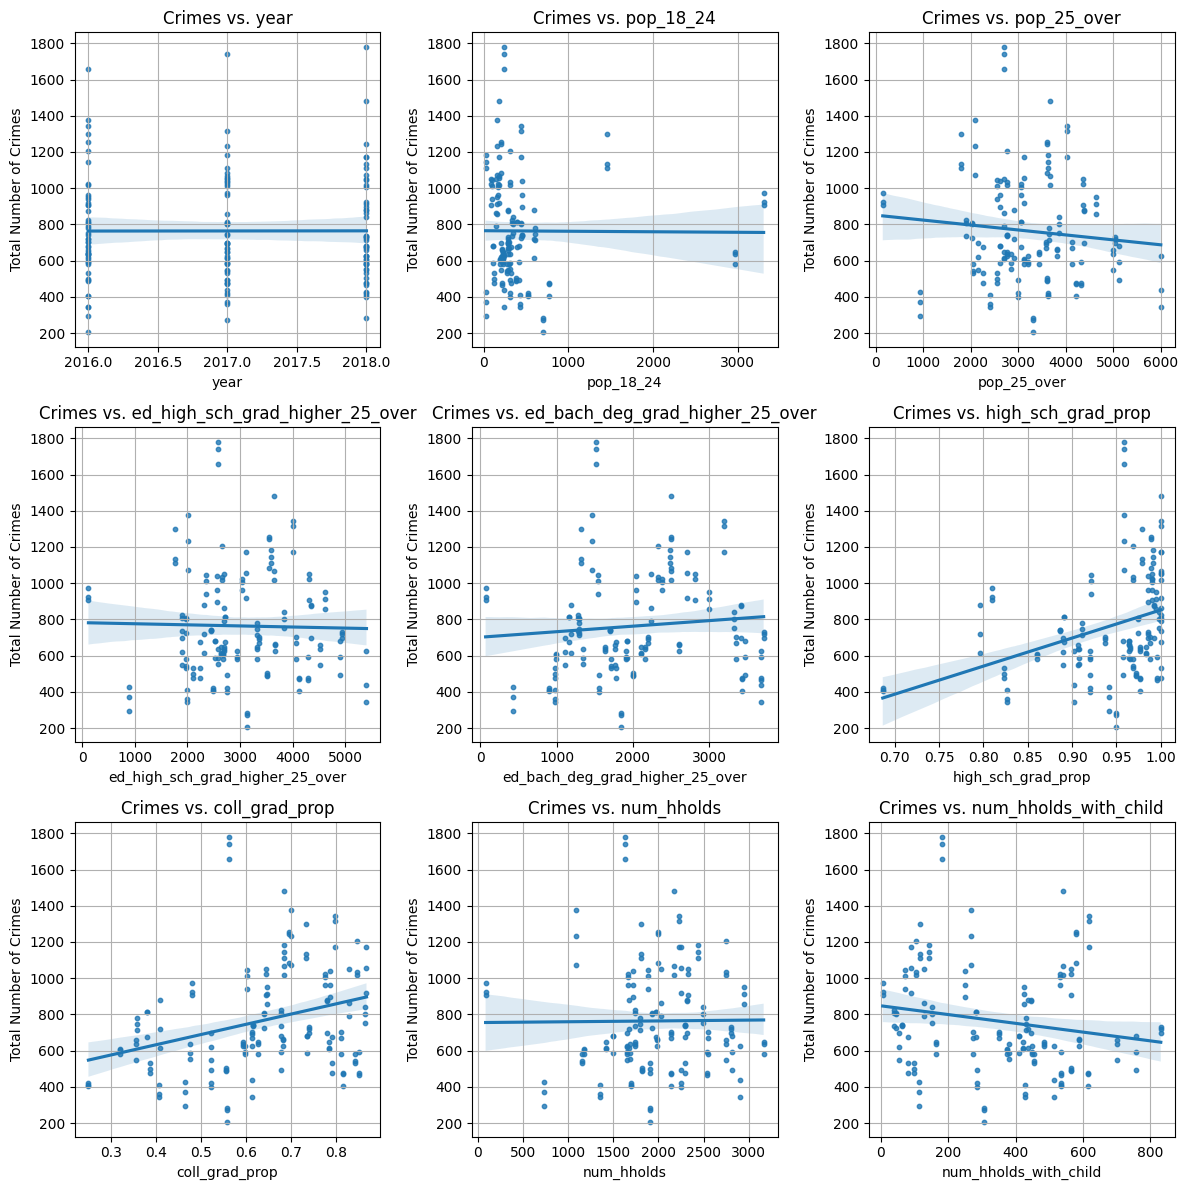

In [22]:
# Visualize a regression fit for all the variables
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten() 
for i, col in enumerate(explanatory_cols):
    # Create a scatter plot with a regression line
    sns.regplot(x=col, y='num_crimes', data=data_reg, ax=axes[i], scatter_kws={'s': 10}) #scatter_kws to make points smaller.
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Total Number of Crimes")
    axes[i].set_title(f"Crimes vs. {col}")
    axes[i].grid(True)
plt.tight_layout()
plt.show()


In [23]:
explanatory_cols=['year', 'pop_18_24', 'pop_25_over','ed_high_sch_grad_higher_25_over', 'ed_bach_deg_grad_higher_25_over',
                  'high_sch_grad_prop', 'coll_grad_prop','num_hholds', 'num_hholds_with_child']
results = []
for col in explanatory_cols:
    if col in data_reg.columns:
        X = sm.add_constant(data_reg[col])
        y = data_reg['num_crimes']
        model = sm.OLS(y, X).fit()
        results.append({
            'predictor': col,
            'p_value': float(model.pvalues[col]),
            'r_squared': float(model.rsquared)
        })
df_results = pd.DataFrame(data=results)
display(df_results)

,predictor,p_value,r_squared
0,year,0.984350,0.000003
1,pop_18_24,0.943075,0.000035
2,pop_25_over,0.227227,0.009837
3,ed_high_sch_grad_higher_25_over,0.794697,0.000459
4,ed_bach_deg_grad_higher_25_over,0.258456,0.008620
5,high_sch_grad_prop,0.000017,0.118050
6,coll_grad_prop,0.000118,0.095634
7,num_hholds,0.913144,0.000081
8,num_hholds_with_child,0.031324,0.030935


In [24]:
# What is the highest r squared since all the p_values are 0
r_squared_max = float('-inf')
winner = []
for item in results:
    if item['r_squared'] > r_squared_max:
        winner = [item['predictor'], item['r_squared']]
        r_squared_max = item['r_squared']
    
print(winner)

['high_sch_grad_prop', 0.11804982793386454]


The model with the best fit, ie a statistically significant association between the predictor (variable) and the response (number of crimes) is high_sch_grad_prop.<p>
This is because the p-value is below .05 and it has a high r-squared.<p>
coll_grad_prop might also have some predictive value.

#### (b) Multiple regression

Fit a multiple regression model to predict the response using all of the predictors from the previous section. Describe your results. For which predictors can we reject the null hypothesis $H_0: \beta_j = 0$? Are these the same from the previous section? Explain what may be going on.

In [29]:
import re

# Multiple Regression
X = data_reg[explanatory_cols]
X = sm.add_constant(X)  # Add a constant term
y = data_reg['num_crimes']

model = sm.OLS(y, X).fit()
# Get the summary as a string
summary_text = model.summary().as_text()

# Extract R-squared using regular expressions
r_squared_match = float(re.search(r"R-squared:\s*(\d+\.\d+)", summary_text).group(1))
print(f"R-squared of the multiple regression model: {r_squared_match}")
# Extract p-values
p_values = model.pvalues

# Identify significant predictors (p < 0.05)
significant_predictors = p_values[p_values < 0.05].index.tolist()
print("\nReject the null hypothesis (p < 0.05):", significant_predictors)

R-squared of the multiple regression model: 0.238

Reject the null hypothesis (p < 0.05): ['pop_25_over', 'ed_high_sch_grad_higher_25_over', 'ed_bach_deg_grad_higher_25_over', 'high_sch_grad_prop', 'coll_grad_prop', 'num_hholds_with_child']


The significant predictors in the multiple regression and single variable regressions will not be the same, because in the multiple regression, the predictors are tested together. This accounts for the correlation between predictors.<p>
For example, if high school graduation rate and college graduation rate are highly correlated, then in a single variable regression, both might appear significant.<p>
Multiple regression models provide a more comprehensive understanding of the relationships between the predictors and the response, accounting for the effects of all predictors simultaneously.<p>
We will reject the null hypothesis for `['pop_25_over', 'ed_high_sch_grad_higher_25_over', 'ed_bach_deg_grad_higher_25_over', 'high_sch_grad_prop', 'coll_grad_prop', 'num_hholds_with_child']`

#### (c) Interpret relationships

For each of the variables in the multivariate regression model, interpret the relationship between the explanatory variable and the response variable based on the calculated coefficient. Do the relationships make sense to you? What are possible explanations about the observed coefficients?

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_crimes   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     4.848
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.20e-05
Time:                        21:56:45   Log-Likelihood:                -1044.6
No. Observations:                 150   AIC:                             2109.
Df Residuals:                     140   BIC:                             2139.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1899.7945   5.35e+04      0.036      0.972   -1.04e+05    1.08e+05
year                                0.5800     26.500      0.022      0.983     -51.811      52.971
pop_18_24                          -0.0386      0.046     -0.830      0.408      -0.131       0.053
pop_25_over                        -1.1098      0.416     -2.671      0.008      -1.931      -0.288
ed_high_sch_grad_higher_25_over     1.7377      0.523      3.321      0.001       0.703       2.772
ed_bach_deg_grad_higher_25_over    -0.7267      0.219     -3.316      0.001      -1.160      -0.293
high_sch_grad_prop              -3904.0608   1756.751     -2.222      0.028   -7377.251    -430.871
coll_grad_prop                   2449.7761    751.817      3.258      0.001     963.394    3936.158
num_hholds                         -0.1154      0.090     -1.277      0.204      -0.294       0.063
num_hholds_with_child              -0.4567      0.194     -2.350      0.020      -0.841      -0.072
==============================================================================
Omnibus:                       32.370   Durbin-Watson:                   0.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.605
Skew:                           1.046   Prob(JB):                     1.39e-12
Kurtosis:                       5.087   Cond. No.                     1.45e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The difference between `high_sch_grad_prop` and `coll_grad_prop` is unexpected if we simply assumed that more crime happens in areas with less educated people, however, since we filtered on `['THEFT', 'BURGLARY', 'VEH']` this actually makes more sense. An area with higher college graduation rates, would have higher incomes and therefore higher incidents of propery crimes.

#### (d) What about duplication?

Though we had crime incident data for each individual year, we duplicated the census and household data for each tract across each year. As such, we assumed that these measures can be assumed to be constant for each tract across the years examined. What are some potential downsides to doing so?

Obviously whenever census tract data is updated, which could be annually or every ten years, the data will change and if we go back far enough, eventually the data would likely be completely invalid. Ie, we could not use the proportion of college graduates from 2020 to determine statistical significance of data from 2010 as it would likely be far off from the actual values.

#### (e) Examine residuals

Plot the residuals for the multiple regression model for each of the following as the x-axis: `year`, `ed_high_sch_grad_higher_25_over`, `coll_grad_prop`. Comment on what you see.

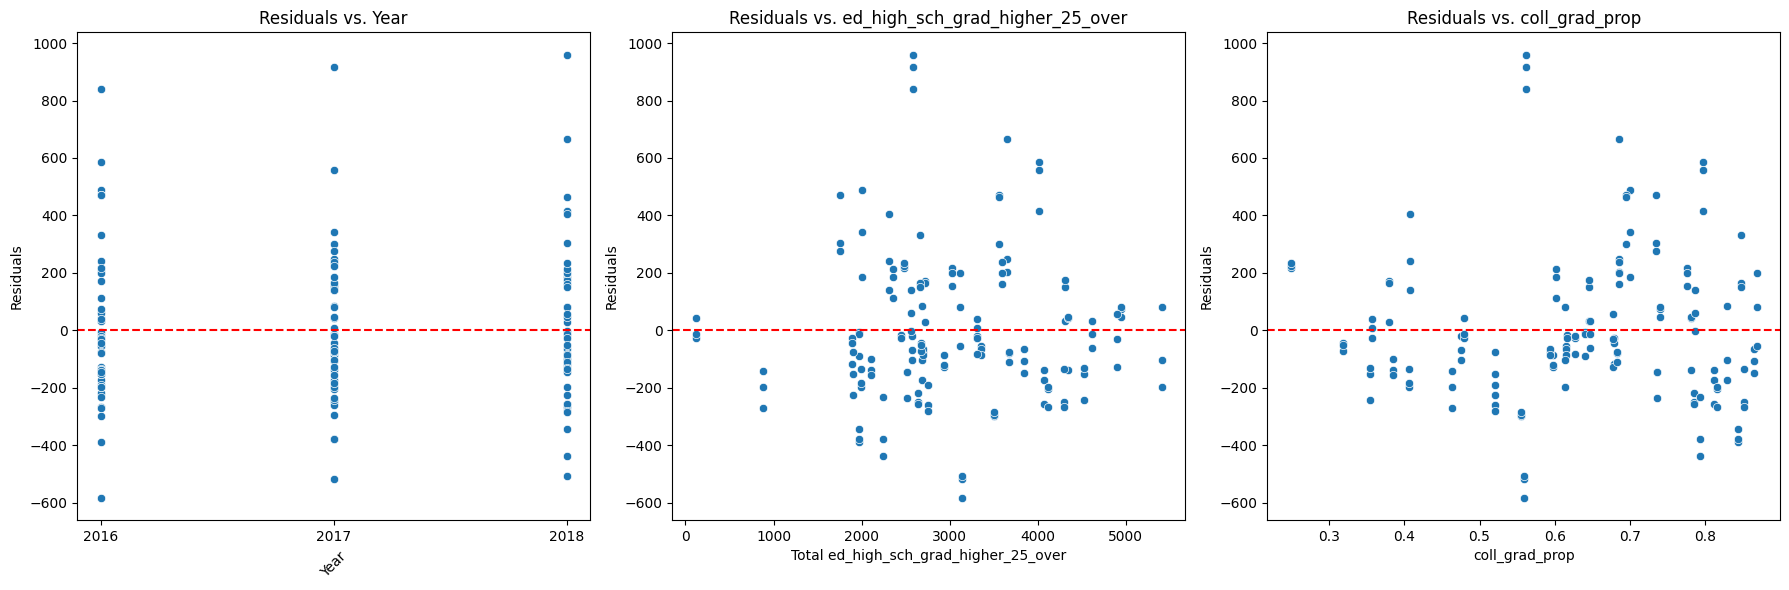

In [27]:
residuals = model.resid

# Create scatter plots of residuals
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for residuals vs. year
sns.scatterplot(x=data_reg['year'], y=residuals, ax=axes[0])
axes[0].set_xlabel("Year", rotation=45)
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs. Year")
# Convert year labels to integers
years = data_reg['year'].unique().astype(int)  # Get unique years and convert to integers
axes[0].set_xticks(years)  # Set x-axis ticks to the integer year values
axes[0].set_xticklabels(years) # Set x-axis tick labels to the integer year values

# Scatter plot for residuals vs. ed_high_sch_grad_higher_25_over
sns.scatterplot(x=data_reg['ed_high_sch_grad_higher_25_over'], y=residuals, ax=axes[1])
axes[1].set_xlabel("Total ed_high_sch_grad_higher_25_over")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals vs. ed_high_sch_grad_higher_25_over")

# Scatter plot for residuals vs. coll_grad_prop
sns.scatterplot(x=data_reg['coll_grad_prop'], y=residuals, ax=axes[2])
axes[2].set_xlabel("coll_grad_prop")
axes[2].set_ylabel("Residuals")
axes[2].set_title("Residuals vs. coll_grad_prop")

for i in range(0,3):
    axes[i].axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.tight_layout()
plt.show()

<b>Year</b><p>
It looks like the trend is naturally upward for year indicating that there is a time related relationship to number of crimes.<p>
This is probably not the correct visual for this type of data.<p>

<b>ed_high_sch_grad_higher_25_over</b><p>
The plot looks mostly random, indicating a good fit.<p>

<b>coll_grad_prop</b><p>
The plot looks mostly random, indicating a good fit.<p>

#### (f) Thinking critically

Amidst data features like population are features like educational attainment per tract. This brings to light the fact that there may be specific demographic and socioeconomic variables/characteristics that are also associated with educational attainment. Whether intentional or not, someone looking at this data might infer a link between crime and educational attainment just due to the variables present. Even worse, someone might use the data to support harsh policing policies based on specific demographics or socioeconomic variables. Discuss, in a few paragraphs, how such datasets could be used (1) in a harmful way, and (2) in a beneficial way for society.

1. There are so many ways that models like this can be used in harmful ways. Much like described in the video "Weapons of Math Destruction" these results could be used to limit funding or limit policing assuming it is a "lost cause". One could make political assumptions about neighborhoods that they are too woke or liberal and not put enough police on patrol.<p>

2. There are also beneficial things that could be done: for example, knowing that there was high crime and low college graduation rates could help focus funding on preparing high school students in that area for college. Using the data in the opposite way as in #1 would ensure that an appropriate level of services were applied.<p>